<font size='6'> Fairfax County Housing Values </font> <br style = 'line-height: 50px;'>
This project applies regression techniques to predict future housing market values for Fairfax County, VA. This area has experienced rapid development in the past and it would be insightful to see what the future could hold for this county, and by extension, the greater DC Metropolitan Area.

# Preparing the data
All data used for this project was obtained from the [Fairfax County website's demographic reports](https://www.fairfaxcounty.gov/demographics/reports). It spans the years from 1991 to 2018 and includes the estimated population, number of households, the number of housing units, median household income, and the median market value for each year. <br>
<font size='1.5'> *****Note that some data for the median household income is missing and will be dealt with appropriately**</font>

In [23]:
# Importing the libraries
from sklearn.impute import SimpleImputer
from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

# Displaying all cell outputs
InteractiveShell.ast_node_interactivity = 'all'
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Importing the dataset
df = pd.read_csv(
    'https://rahbarprojects.s3.amazonaws.com/fairfax_county_housing.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values

# Filling in missing data
imputer = SimpleImputer()
imputer = imputer.fit(X[:, 4:5])
X[:, 4:5] = imputer.transform(X[:, 4:5])

# Converting float values to int
X = X.astype(int)

A look at the dataset :

In [16]:
df = pd.DataFrame(X, columns=['year', 'population',
                              'households', 'housing units', 'median household income'])
df['median market value'] = pd.DataFrame(y)
df.head()

,year,population,households,housing units,median household income,median market value
0,1991,827119,296300,308202,61000,190100
1,1992,837141,301900,312324,94082,183700
2,1993,851858,307000,316723,64000,183500
3,1994,863100,312000,322007,94082,184400
4,1995,879401,317000,328151,70000,186800


And the data, plotted side by side :

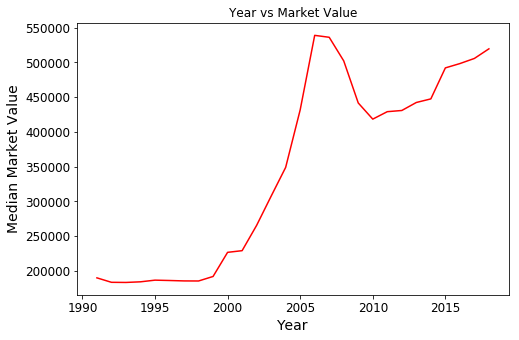

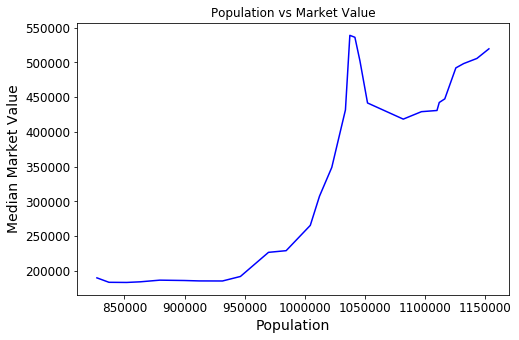

In [42]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.plot(X[:,0], y, color = 'red');
plt.title('Year vs Market Value')
plt.xlabel('Year')
plt.ylabel('Median Market Value')
plt.show();
fig = plt.figure(figsize = (17,5))
ax1 = fig.add_subplot(1,2,2)
plt.plot(X[:,1], y, color = 'blue');
plt.title('Population vs Market Value')
plt.xlabel('Population')
plt.ylabel('Median Market Value')
plt.show();

# Analysis/Modeling

Firstly, we will work with a multivariate linear regression model :

In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

# Fitting the Linear Regression model to the training set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Training model on testing set
y_pred = lin_reg.predict(X_test)

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here